In [3]:
from pydogpack.utils import x_functions
from pydogpack import main
from apps.advection.smoothscalarexample import smooth_scalar_example
from apps.advection import advection
from pydogpack.visualize import plot
import pydogpack.math_utils as math_utils
import pydogpack.dg_utils as dg_utils
from pydogpack.tests.utils import utils

# Smooth Scalar Advection Example

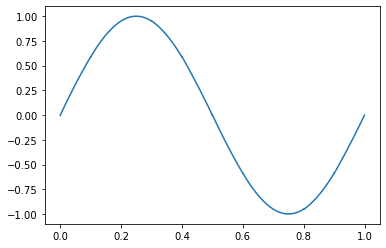

In [20]:
wavespeed = 1.0
initial_condition = x_functions.Sine()
problem = smooth_scalar_example.SmoothScalarExample(wavespeed, initial_condition)
problem.parameters["time_stepping"]["is_verbose"] = False
final_solution = main.run(problem)
p = plot.get_dg_plot(final_solution)

# Convergence Test

## DG Convergence

In [26]:
wavespeed = 1.0
initial_condition = x_functions.Sine()
final_time = 1.0
exact_solution = advection.ExactSolution(initial_condition, wavespeed)
exact_final_solution = x_functions.FrozenT(exact_solution, final_time)

problem = smooth_scalar_example.SmoothScalarExample(wavespeed, initial_condition)
problem.parameters["final_time"] = final_time
problem.parameters["is_weak"] = True

problem.parameters["basis"]["basis_class"] = "legendre"
problem.parameters["basis"]["inner_product_constant"] = 0.5

problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = False

problem.parameters["mesh"]["mesh_class"] = "mesh_1d_uniform"
problem.parameters["mesh"]["x_left"] = 0.0
problem.parameters["mesh"]["x_right"] = 1.0

problem.parameters["boundary_condition"]["boundary_condition_class"] = "periodic"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

In [42]:
for num_basis_cpts in range(1, 5):
    problem.parameters["basis"]["num_basis_cpts"] = num_basis_cpts
    problem.parameters["time_stepping"]["order"] = num_basis_cpts
    
    cfl = dg_utils.standard_cfls(num_basis_cpts)
    error_list = []
    for num_elems in [20, 40]:
        problem.parameters["delta_t"] = dg_utils.get_delta_t(cfl, wavespeed, 1.0 / num_elems)
        problem.parameters["mesh"]["num_elems"] = num_elems
        final_solution = main.run(problem)
        error = math_utils.compute_error(final_solution, exact_final_solution)
        error_list.append(error)
    order = utils.convergence_order(error_list)
    print(order)
    assert order >= num_basis_cpts

1.0
2.0
3.0
4.0


## FV Convergence

In [5]:
wavespeed = 1.0
initial_condition = x_functions.Sine()
final_time = 1.0
exact_solution = advection.ExactSolution(initial_condition, wavespeed)
exact_final_solution = x_functions.FrozenT(exact_solution, final_time)

problem = smooth_scalar_example.SmoothScalarExample(wavespeed, initial_condition)
problem.parameters["final_time"] = final_time
problem.parameters["use_wave_propogation_method"] = True

problem.parameters["basis"]["basis_class"] = "finite_volume"

problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["order"] = 1
problem.parameters["time_stepping"]["is_verbose"] = False

problem.parameters["mesh"]["mesh_class"] = "mesh_1d_uniform"
problem.parameters["mesh"]["x_left"] = 0.0
problem.parameters["mesh"]["x_right"] = 1.0

problem.parameters["fluctuation_solver"]["fluctuation_solver_class"] = "exact_linear"

problem.parameters["boundary_condition"]["boundary_condition_class"] = "periodic"

In [18]:
cfl = dg_utils.standard_cfls(1)
error_list = []
for num_elems in [20, 40]:
    problem.parameters["delta_t"] = dg_utils.get_delta_t(cfl, wavespeed, 1.0 / num_elems)
    problem.parameters["mesh"]["num_elems"] = num_elems
    final_solution = main.run(problem)
    error = math_utils.compute_error(final_solution, exact_final_solution)
    error_list.append(error)
order = utils.convergence_order(error_list)
print(order)
print(error_list)
assert order >= 1

-1.0
[1.0863599218806744e-15, 2.7797933034081654e-15]


AssertionError: 

RuntimeError: Requested MovieWriter (ffmpeg) not available

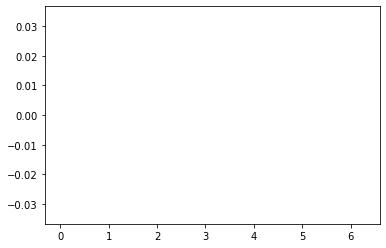

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(2):
    im = plt.plot(x, (i / 30)*np.sin(x), animated=True)
    ims.append(im)

ani = animation.ArtistAnimation(fig, ims, interval=5, blit=False,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)
from IPython.display import HTML
HTML(ani.to_html5_video())

In [35]:
ims

[[<matplotlib.lines.Line2D at 0x11cb4d710>],